# Analisi Iris

In [52]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [53]:
data = load_iris()
X = data.data
y = data.target

## creazione dataframe

In [54]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = pd.Categorical.from_codes(y, data.target_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [56]:
# Standardizzazione delle feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [58]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [59]:
""" model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train) """

' model = RandomForestClassifier(n_estimators=100, random_state=42)\nmodel.fit(X_train, y_train) '

In [60]:
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy sul test set: {accuracy:.2f}')

Accuracy sul test set: 1.00


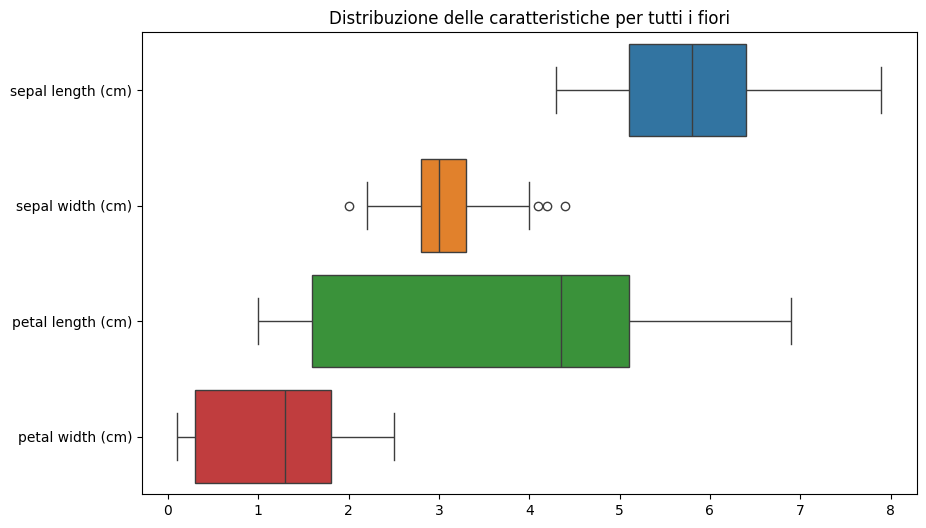

In [61]:
# Boxplot delle caratteristiche
plt.figure(figsize=(10,6))
sns.boxplot(data=df.iloc[:,:4], orient="h")
plt.title("Distribuzione delle caratteristiche per tutti i fiori")
plt.show()

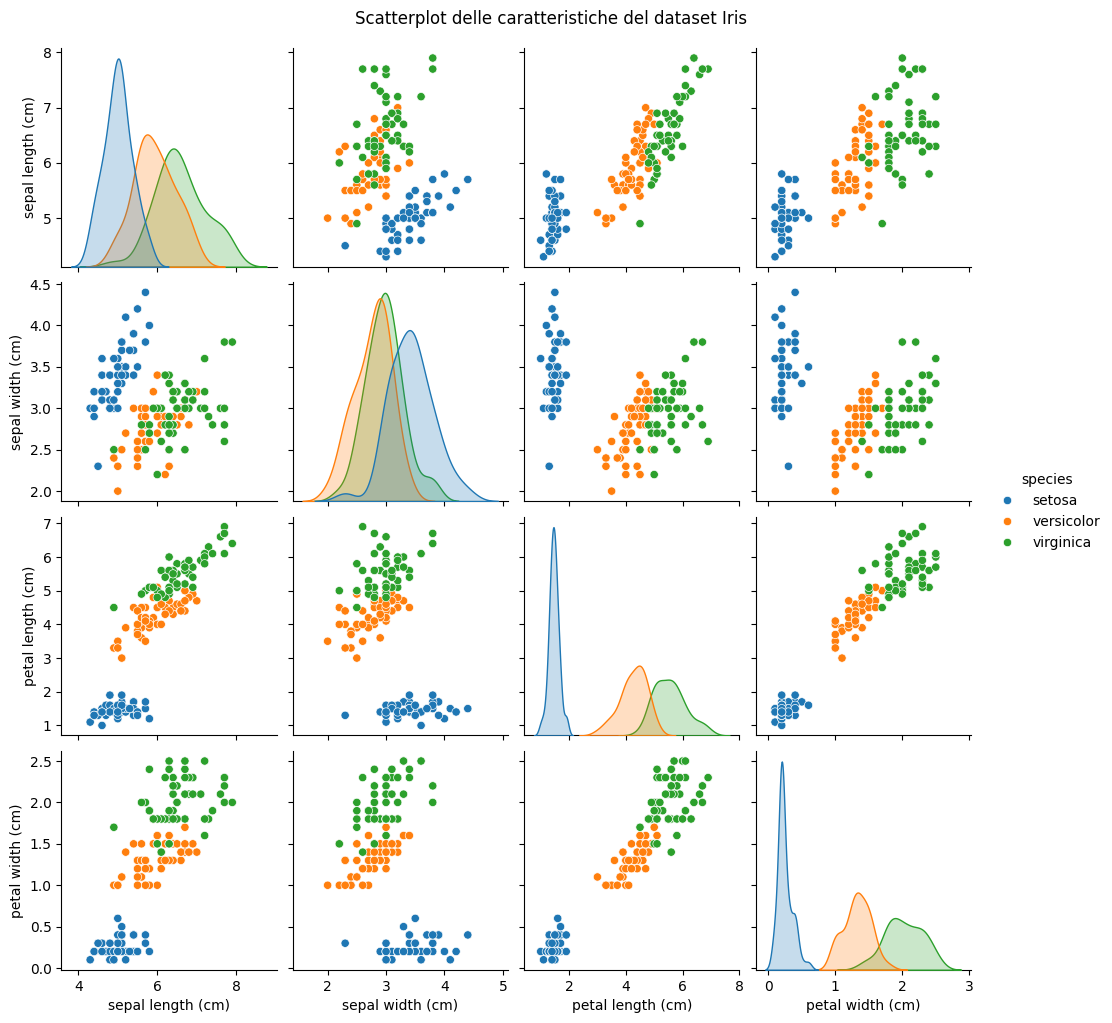

In [62]:
# Pairplot per vedere separazione delle specie
sns.pairplot(df, hue="species", height=2.5)
plt.suptitle("Scatterplot delle caratteristiche del dataset Iris", y=1.02)
plt.show()

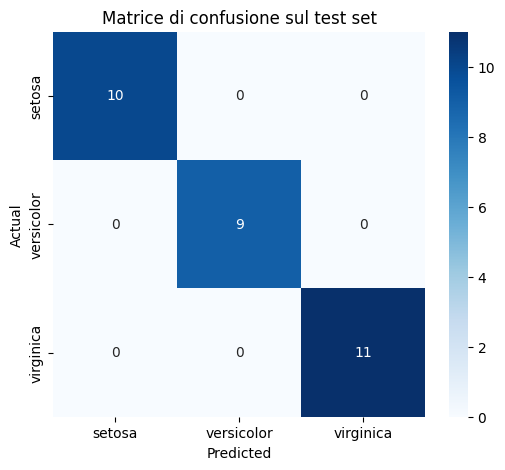

In [63]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=data.target_names, yticklabels=data.target_names, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matrice di confusione sul test set")
plt.show()